In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling as pp

# EDA

In [123]:
train = pd.read_csv('train.csv')
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [124]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [125]:
train.shape

(10886, 12)

In [126]:
test = pd.read_csv('test.csv')
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [127]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [128]:
#profile = pp.ProfileReport(train, title="Pandas Profiling Report")
#profile.to_file("bike_pp_20220822.html")


#### 缺失值

缺失值仅1项


#### correlation

casual & registered 和 count高度相关，但只存在于training data，不存在于test data，若作为explanatory variable会导致data leakage。故需要删除。


#### 异常分布

Windspeed = 0 出现频次较高

weather = 4 （大雨大雪等极端天气）仅出现1次

holiday 出现频次仅占3%


# Data Wrangling

In [129]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [130]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [131]:
train = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','count']]
# 选中test data 出现过的字段
train['is_train'] = 1
test['is_train'] = 0
data = train.append(test).reset_index(drop = True)
data[data['is_train']== 1].tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336.0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241.0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168.0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129.0,1
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88.0,1


In [132]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count         float64
is_train        int64
dtype: object

In [133]:
def mutate_weather(x):
    if x == 1:
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif x == 2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x == 3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

def mutate_season(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Autumn'
    else:
        return 'Winter'
data['season_desc'] = data['season'].apply(lambda x: mutate_season(x))
data['weather_desc'] = data['weather'].apply(lambda x: mutate_weather(x))
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train,season_desc,weather_desc
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,0,Spring,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,0,Spring,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [173]:
datetime.strptime(data['datetime'][0], '%Y-%m-%d %H:%M:%S').month

1

In [174]:
from datetime import datetime

def mutate_workday(x):
    date_time = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')# 从datestring转成datetime
    return date_time.strftime('%A')# 翻译成周几
def mutate_hour(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour # 从datestring翻译成第几小时
def mutate_month(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month # 从datestring转月份

data['weekday'] = data['datetime'].apply(lambda x: mutate_workday(x))
data['hour'] = data['datetime'].apply(lambda x: mutate_hour(x))
data['month'] = data['datetime'].apply(lambda x:mutate_month(x))
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,is_train,season_desc,weather_desc,weekday,hour,month
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,0,Spring,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Monday,19,12
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,0,Spring,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Monday,20,12
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy",Monday,21,12
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy",Monday,22,12
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy",Monday,23,12


[Text(0.5, 0, 'Weather'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

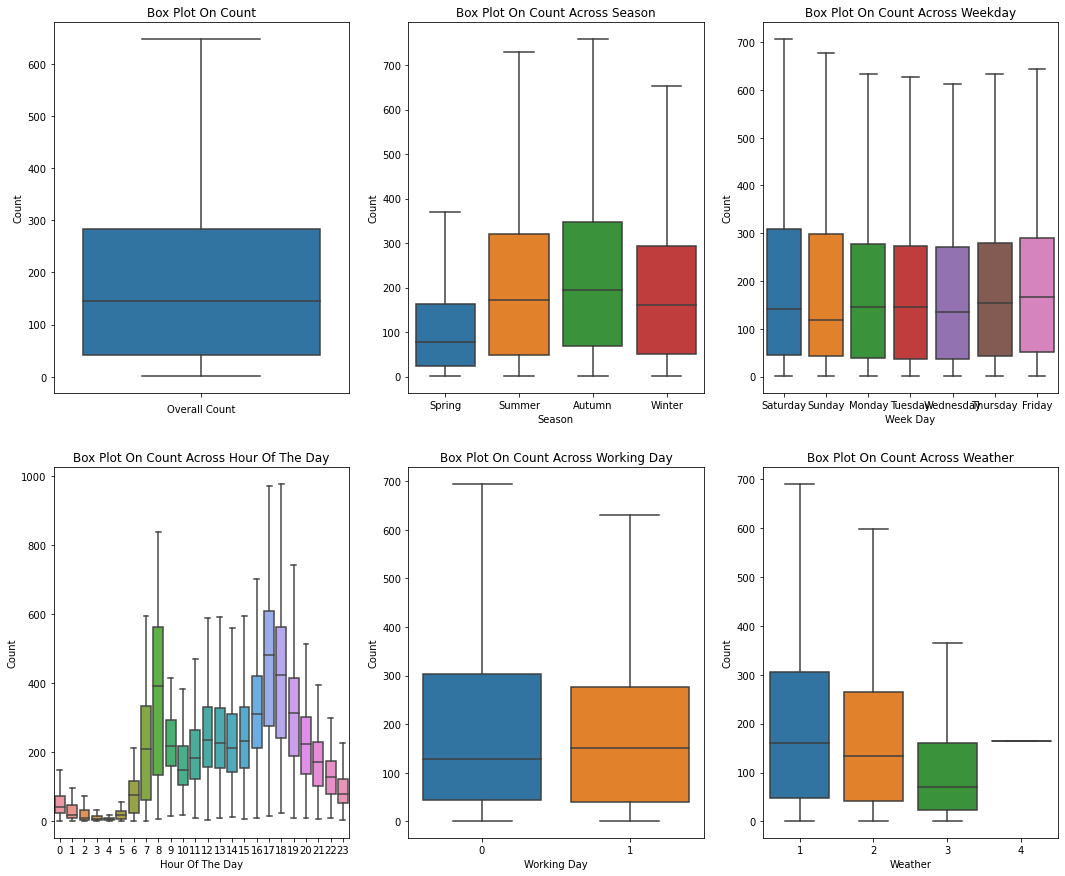

In [175]:
import seaborn as sn
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18, 15)
sn.boxplot(data=data,y="count",orient="v",ax=axes[0][0],showfliers = False)
sn.boxplot(data=data,y="count",x="season_desc",orient="v",ax=axes[0][1],showfliers = False)
sn.boxplot(data=data,y="count",x="hour",orient="v",ax=axes[1][0],showfliers = False)
sn.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1][1],showfliers = False)
sn.boxplot(data=data,y='count',x='weekday',orient = 'v', ax = axes[0][2],showfliers = False)
sn.boxplot(data=data,y='count',x='weather',orient = 'v', ax = axes[1][2],showfliers = False)

axes[0][0].set(xlabel = 'Overall Count',ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[0][2].set(xlabel = 'Week Day', ylabel = 'Count', title = 'Box Plot On Count Across Weekday')
axes[1][2].set(xlabel = 'Weather', ylabel = 'Count', title = 'Box Plot On Count Across Weather')

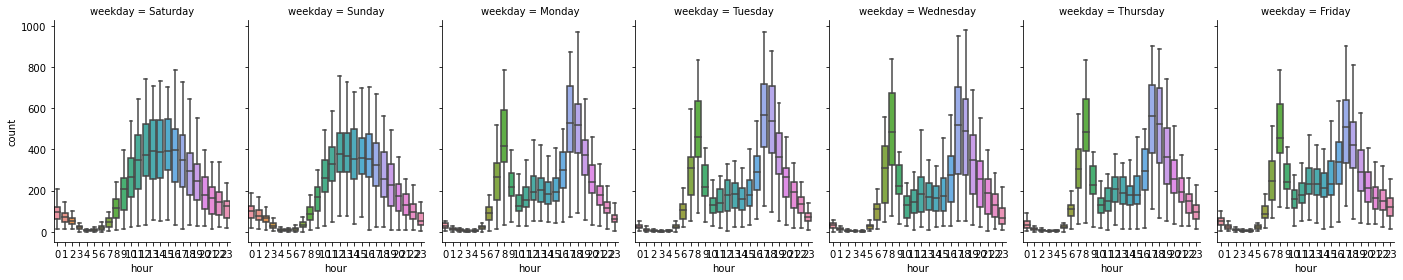

In [176]:
# combining different features together and check difference
sn.catplot(x="hour", 
           y="count",
           #hue="season",
           col="weekday",
           data=data, 
           kind="box",
           height=4,
           aspect=.7,
           showfliers = False)

春天略低于其他三个季节，秋季count均值最高

越接近周末count越高

天气越好count越高

周一到周五，7-9点，17-19点这4个小时是用车高峰，周末则较为平缓 => 也许可以增加dummy variable is_weekday_peak_time

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count across month')]

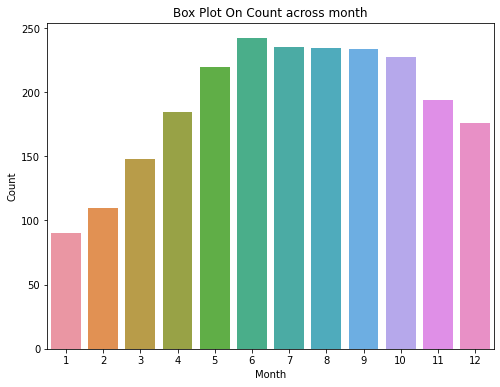

In [185]:
month_count = pd.DataFrame(data.groupby("month")["count"].mean()).reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

sn.barplot(x=month_count['month'],
           y=month_count['count'])

ax.set(xlabel = 'Month',ylabel='Count',title="Box Plot On Count across month")